In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
print("The information are:", df.info())
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace = True, axis =1)
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], inplace = True, axis = 1)
df.drop(['CLIENTNUM'], inplace = True, axis =1)
df.head()
#X = df['CLIENTNUM', 'Customer_Age', 'Dependent_count', Education_Level' Marital_StatusIncome_Category	Card_Category]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-p

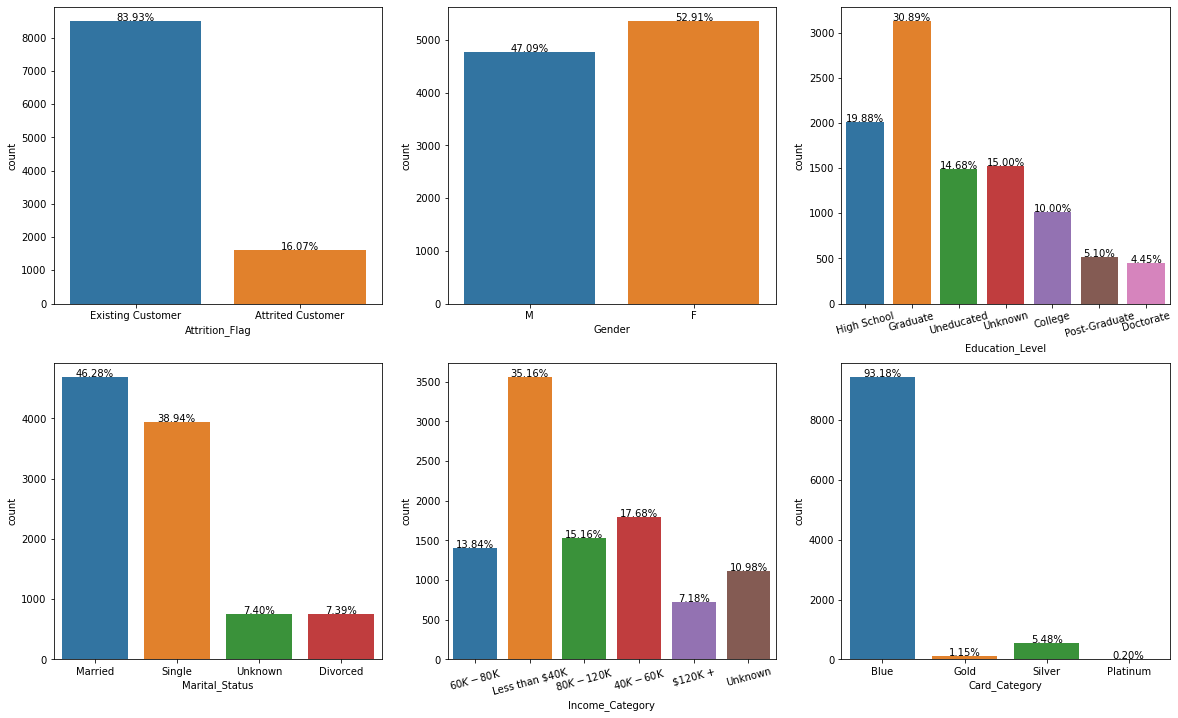

In [4]:
import seaborn as sns

catt = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

def pltCountplot(catt):
    
    fig, axis = plt.subplots(len(catt) // 3,3, figsize=(20,12))  

    index = 0
    for i in range(len(catt) // 3):
        for j in range(3):
            
            ax = sns.countplot(catt[index], data=df, ax=axis[i][j])
            
            if catt[index] in ['Education_Level', 'Income_Category']:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(df)*100),
                        ha="center") 
            index += 1
pltCountplot(catt)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-p

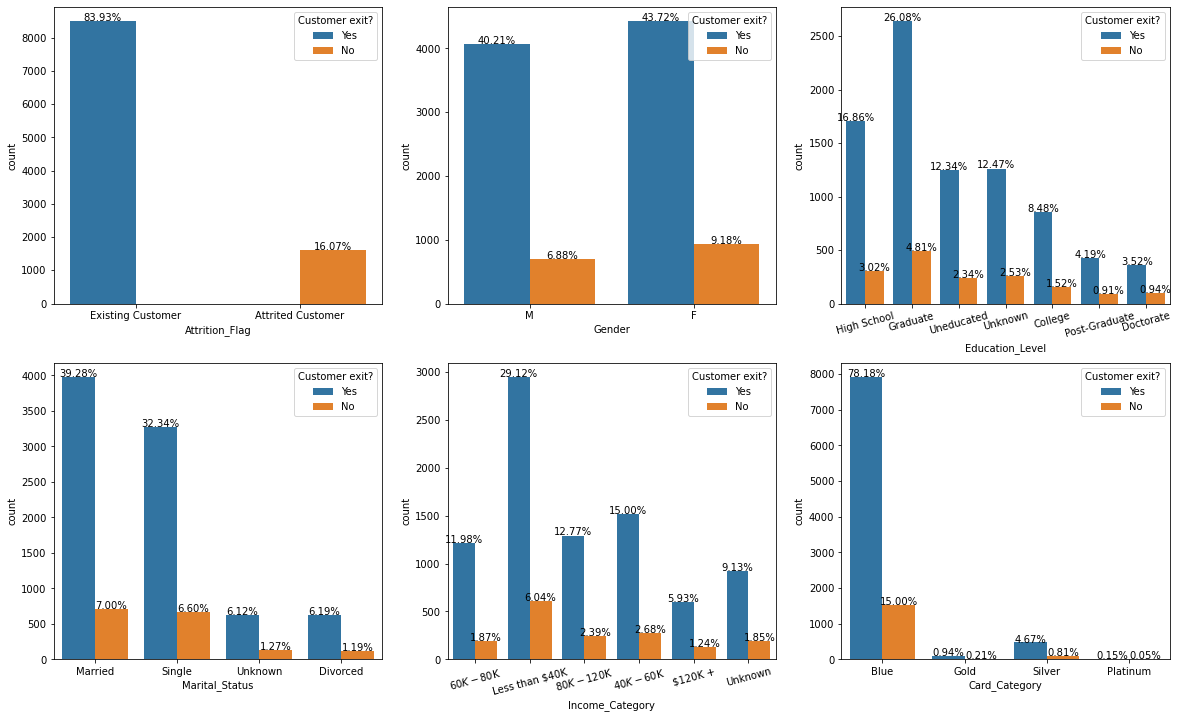

In [5]:
def pltCountplotHueTarget(catt, target):
    
    fig, axis = plt.subplots(len(catt) // 3,3, figsize=(20,12))  

    index = 0
    for i in range(len(catt) // 3):
        for j in range(3):
            
            ax = sns.countplot(catt[index], data=df, hue=target, ax=axis[i][j])
            
            ax.legend(title='Customer exit?',
                      loc='upper right',
                      labels=['Yes', 'No'])
            
            if catt[index] in ['Education_Level', 'Income_Category']:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(df)*100),
                        ha="center") 
            index += 1



pltCountplotHueTarget(catt, 'Attrition_Flag')

In [6]:
from scipy import stats
from scipy.stats import norm


from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

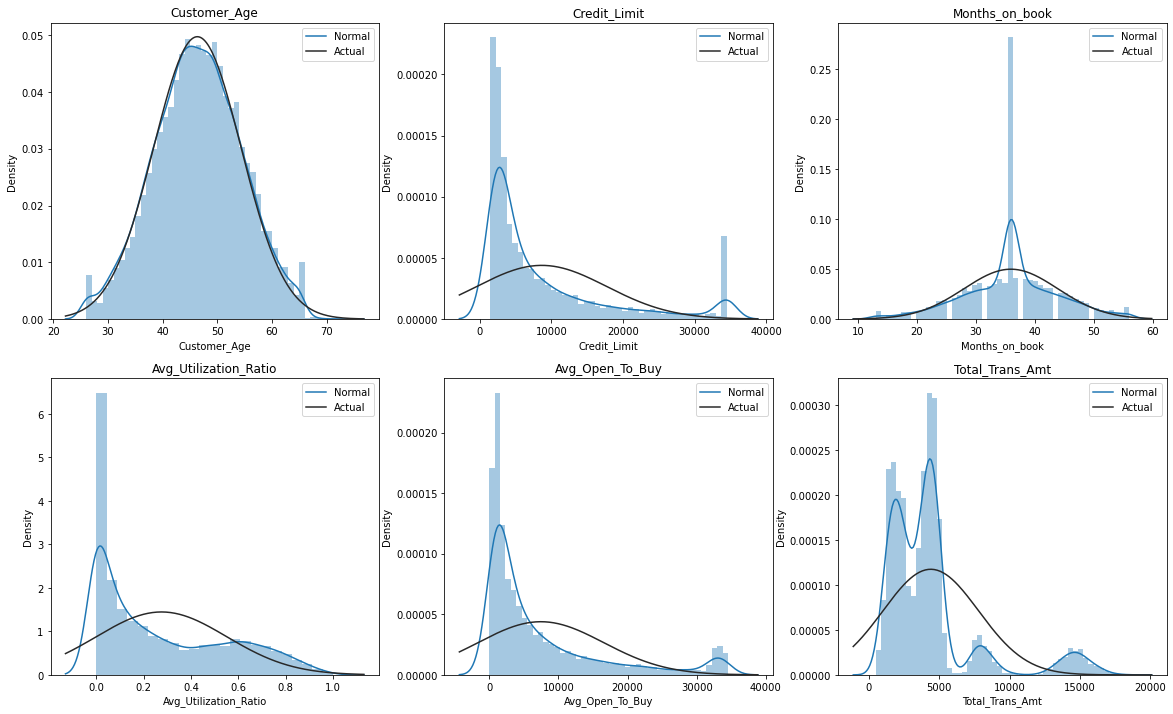

In [7]:


hist_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt']


def plotDistPlot(columns):
    fig, ax = plt.subplots(len(columns)//3, 3,figsize=(20, 12))
    
    index = 0
    for i in range(2):
        for j in range(3):
            sns.distplot(df.loc[:, columns[index]],
                         hist=True,
                         fit=norm,
                         kde=True,
                         ax=ax[i][j])
            ax[i][j].set_title(columns[index])
            ax[i][j].legend(labels=['Normal', 'Actual'])
            index += 1
plotDistPlot(hist_columns)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

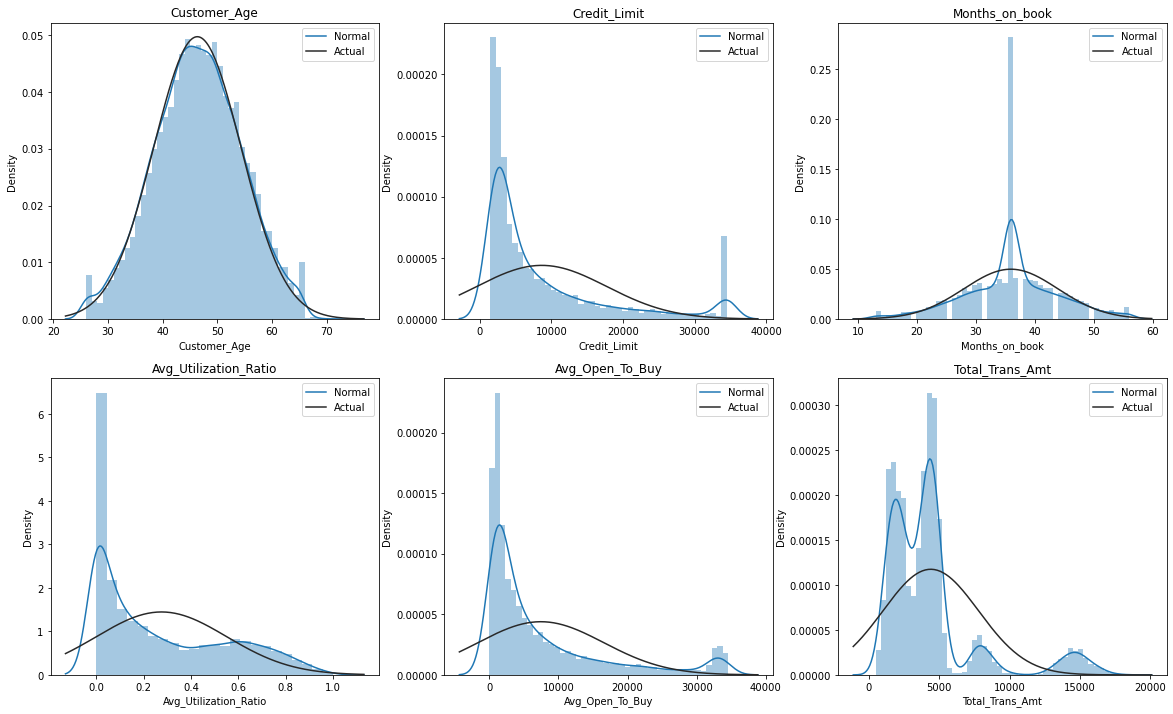

In [8]:


hist_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt']


def plotDistPlot(hist_columns):
    fig, ax = plt.subplots(len(hist_columns)//3, 3,figsize=(20, 12))
    
    index = 0
    for i in range(2):
        for j in range(3):
            sns.distplot(df.loc[:, hist_columns[index]],
                         hist=True,
                         fit=norm,
                         kde=True,
                         ax=ax[i][j])
            ax[i][j].set_title(hist_columns[index])
            ax[i][j].legend(labels=['Normal', 'Actual'])
            index += 1
plotDistPlot(hist_columns)

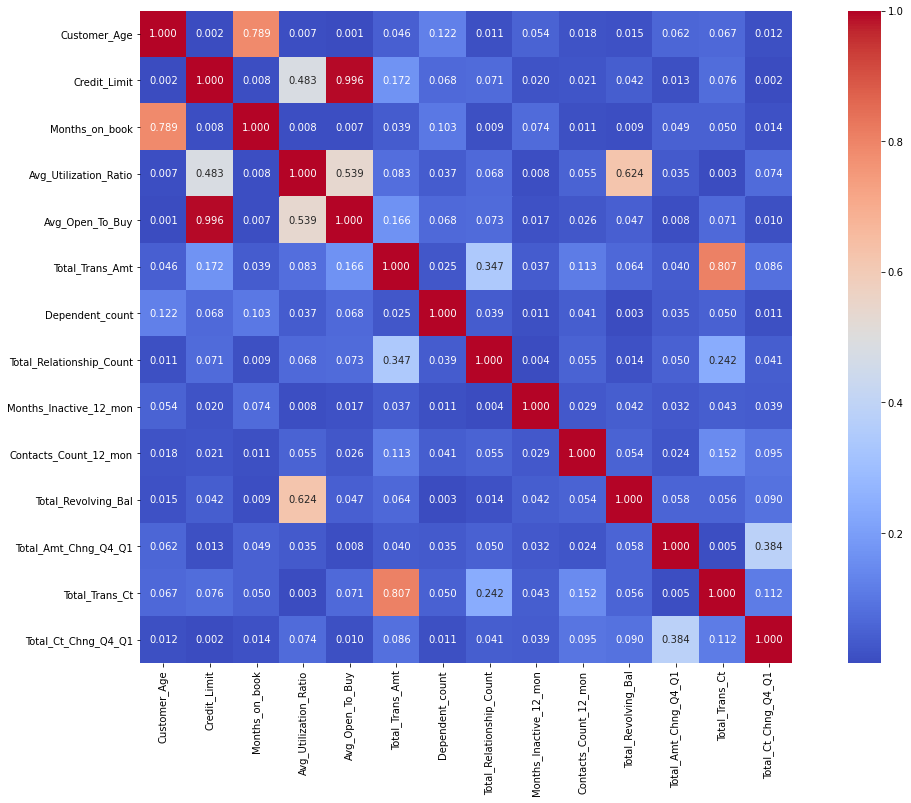

In [9]:
numeric_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt','Dependent_count',
                  'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal',
                  'Total_Amt_Chng_Q4_Q1','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']


corr_data = df.loc[:, numeric_columns].corr()
corr_data
plt.figure(figsize=(20,12))
sns.heatmap(corr_data.abs(), annot=True, fmt='.3f', cmap='coolwarm', square=True)
plt.show()

In [10]:
updated_df = pd.DataFrame()

def tobinary():
    updated_df['Attrition'] = df.Attrition_Flag.map({'Existing Customer': 1, 'Attrited Customer': 0})
    updated_df['Gender'] = df.Gender.map({'M':1, 'F':0})


def stringtoint():
    income_category = df['Income_Category'].replace({'Unknown': 0 , 'Less than $40K':1, '$40K - $60K':2, 
                                                      '$80K - $120K':3, '$60K - $80K':4, '$120K +':5})
    
    education_level_data = df['Education_Level'].replace({'Unknown': 0, 'High School':1, 'Graduate':2, 'Uneducated':3,
                                                         'College':4,'Post-Graduate':5,'Doctorate':6})
    
    updated_df['Income_Category'] = income_category
    updated_df['Education_Level'] = education_level_data

In [11]:
def encode():
    global updated_df
    card_dummies = pd.get_dummies(df['Card_Category'], prefix='Card')
    marital_dummies = pd.get_dummies(df['Marital_Status'], prefix='Marital')
    updated_df = pd.concat([updated_df, marital_dummies, card_dummies], axis=1)
    

    
def concat_with_numerics():
    global updated_df
    updated_df = pd.concat([updated_df, df.loc[:, numeric_columns]], axis=1)

In [12]:
tobinary()
stringtoint()
encode()
concat_with_numerics()

In [13]:
updated_df.describe()

,Attrition,Gender,Income_Category,Education_Level,Marital_Divorced,Marital_Married,Marital_Single,Marital_Unknown,Card_Blue,Card_Gold,...,Avg_Open_To_Buy,Total_Trans_Amt,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,0.470919,2.072578,2.179125,0.073862,0.462822,0.389355,0.073961,0.931767,0.011455,...,7469.139637,4404.086304,2.346203,3.812580,2.341167,2.455317,1162.814061,0.759941,64.858695,0.712222
std,0.367235,0.499178,1.461929,1.576387,0.261559,0.498641,0.487628,0.261720,0.252159,0.106416,...,9090.685324,3397.129254,1.298908,1.554408,1.010622,1.106225,814.987335,0.219207,23.472570,0.238086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,510.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1324.500000,2155.500000,1.000000,3.000000,2.000000,2.000000,359.000000,0.631000,45.000000,0.582000
50%,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,3474.000000,3899.000000,2.000000,4.000000,2.000000,2.000000,1276.000000,0.736000,67.000000,0.702000
75%,1.000000,1.000000,3.000000,3.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,9859.000000,4741.000000,3.000000,5.000000,3.000000,3.000000,1784.000000,0.859000,81.000000,0.818000
max,1.000000,1.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,34516.000000,18484.000000,5.000000,6.000000,6.000000,6.000000,2517.000000,3.397000,139.000000,3.714000


In [14]:
updated_df.head()

,Attrition,Gender,Income_Category,Education_Level,Marital_Divorced,Marital_Married,Marital_Single,Marital_Unknown,Card_Blue,Card_Gold,...,Avg_Open_To_Buy,Total_Trans_Amt,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,1,1,4,1,0,1,0,0,1,0,...,11914.0,1144,3,5,1,3,777,1.335,42,1.625
1,1,0,1,2,0,0,1,0,1,0,...,7392.0,1291,5,6,1,2,864,1.541,33,3.714
2,1,1,3,2,0,1,0,0,1,0,...,3418.0,1887,3,4,1,0,0,2.594,20,2.333
3,1,0,1,1,0,0,0,1,1,0,...,796.0,1171,4,3,4,1,2517,1.405,20,2.333
4,1,1,4,3,0,1,0,0,1,0,...,4716.0,816,3,5,1,0,0,2.175,28,2.500


In [15]:
# conda install -c anaconda py-xgboost
# print("Xgboost installed successfully")

# import xgboost as xgb
# import lightgbm as lgb

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [16]:
LR = LogisticRegression(C=0.01, solver = 'liblinear')

# m_gbc = GradientBoostingClassifier(random_state=14)

# m_rfc = RandomForestClassifier(criterion='gini', n_estimators=999,
#                             max_depth=4, random_state=14)

# # m_lgb = lgb.LGBMClassifier(num_iterations=550, learning_rate=0.01055,
# #                         max_depth=3, random_state=14)

# # m_xgb = xgb.XGBClassifier(n_estimators=2250,
# #                        max_depth=2, random_state=14)

# m_gnb = GaussianNB()

# m_mlpc = MLPClassifier(random_state=14)

#svc = SVC(probability=True)

In [17]:
X = updated_df.drop('Attrition', axis=1)
y = updated_df['Attrition']

print(X.shape)
print(y.shape)

(10127, 25)
(10127,)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


df1 = scaler.fit_transform(updated_df)
df = df1
X = df
X

array([[ 0.4375063 ,  1.05995565,  1.31847508, ...,  2.62349444,
        -0.97389518,  3.8340026 ],
       [ 0.4375063 , -0.9434357 , -0.73370953, ...,  3.56329284,
        -1.35734038, 12.60857291],
       [ 0.4375063 ,  1.05995565,  0.63441354, ...,  8.36721381,
        -1.91120566,  6.80786367],
       ...,
       [-2.28568136, -0.9434357 , -0.73370953, ...,  0.26943631,
        -0.20700479,  0.44430503],
       [-2.28568136,  1.05995565, -0.04964799, ..., -1.02620809,
        -0.12179474,  0.04106963],
       [-2.28568136, -0.9434357 , -0.73370953, ..., -0.25977056,
        -0.16439977, -0.26555729]])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (8101, 26) (8101,)
Test set: (2026, 26) (2026,)


In [20]:
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss


In [21]:
LR.fit(X_train, y_train)
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [22]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.04928473, 0.95071527],
       [0.0484603 , 0.9515397 ],
       [0.02595432, 0.97404568],
       ...,
       [0.06014792, 0.93985208],
       [0.02332329, 0.97667671],
       [0.06539338, 0.93460662]])

In [29]:
#jaccard_similarity_score(y_test, yhat)

In [23]:
yhattt = LR.predict(X_train)
yhattt

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [24]:
from sklearn.metrics import f1_score
print(f1_score(y_train, yhattt))
print(f1_score(y_test, yhat))

print(log_loss(y_train, yhattt))
print(log_loss(y_test, yhat))
#jaccard_similarity_score(y_train, yhattt)

1.0
1.0
9.992007221626413e-16
9.992007221626413e-16


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[1710    0]
 [   0  316]]


In [26]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       316
           1       1.00      1.00      1.00      1710

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



In [27]:
log_loss(y_test, yhat_prob)

0.03948832899764735

In [28]:
from sklearn import svm
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, y_train)

SVC()

In [29]:
yhat2= clf.predict(X_test)
yhat2

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [30]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat2, average='weighted') 

0.9995060976125704

In [41]:
#jaccard_similarity_score(y_test, yhat2)

In [31]:
yhat222 = clf.predict(X_train)
yhat222

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [32]:
f1_score(y_train, yhat222, average='weighted')

#jaccard_similarity_score(y_train, yhat222)

1.0

Confusion matrix, without normalization
[[1710    0]
 [   0  316]]


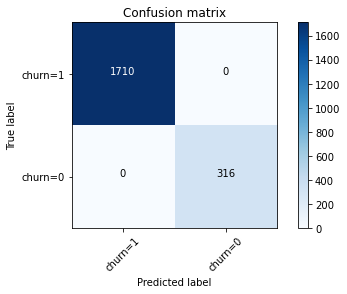

In [33]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [34]:
f1_score(y_test, yhat, average='weighted') 

1.0

In [46]:
# ! pip install mlxtend
# print("mlxtend installed completely")

# from mlxtend.evaluate import bias_variance_decomp

In [ ]:
# mse, bias, var = bias_variance_decomp(LR, X_train, y_train, X_test, y_test, loss = 'mse', num_rounds=200, random_seed=1)

# print('MSE: %.3f' % mse)
# print('Bias: %.3f' % bias)# print('Var: %.3f' % var)

In [35]:
from sklearn import linear_model


alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(l1_ratio =0.7, max_iter = 10000)
train_errors = list()
test_errors = list()

for alpha in  alphas:
    enet.set_params(alpha = alpha)
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))
    
i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("optimal regularization parameter: %s" % alpha_optim)


enet.set_params(alpha = alpha_optim)
coef_ = enet.fit(X,y).coef_
coef_

optimal regularization parameter: 1e-05


array([ 0.37,  0.  ,  0.  , -0.  , -0.  ,  0.  , -0.  , -0.  , -0.  ,
       -0.  , -0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ,
       -0.  ,  0.  , -0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  ])

In [36]:
train_errors

[0.9999999995189405,
 0.9999999992315989,
 0.9999999987726259,
 0.9999999980395052,
 0.9999999968684876,
 0.9999999949980168,
 0.9999999920103115,
 0.9999999872380543,
 0.9999999796153526,
 0.999999967439686,
 0.999999947991684,
 0.9999999169278376,
 0.9999998673105591,
 0.9999997880590664,
 0.999999661475327,
 0.9999994592929572,
 0.9999991363675695,
 0.9999986206012982,
 0.9999977968551886,
 0.999996481264516,
 0.9999943802370511,
 0.9999910250103732,
 0.9999856672200925,
 0.9999771122926552,
 0.9999634537308774,
 0.9999416495099298,
 0.9999068471117318,
 0.9998513087419298,
 0.999762701304066,
 0.9996213785059788,
 0.9993960667621533,
 0.9990370288667975,
 0.9984652536997572,
 0.9975554076528511,
 0.9961090391688162,
 0.9938126456043577,
 0.9901724105609208,
 0.9844133421663772,
 0.9753247857393874,
 0.9610265079681857,
 0.9386197381348446,
 0.9036765467789665,
 0.849511406215161,
 0.7661767097051108,
 0.6391407142873536,
 0.4476599713684647,
 0.16297281800778562,
 0.0,
 0.0,
 0.0,


In [37]:
test_errors

[0.999999999518815,
 0.9999999992313985,
 0.9999999987723058,
 0.999999998038994,
 0.9999999968676709,
 0.9999999949967123,
 0.9999999920082278,
 0.9999999872347258,
 0.9999999796100362,
 0.999999967431194,
 0.9999999479781199,
 0.9999999169061718,
 0.9999998672759528,
 0.9999997880037907,
 0.9999996613870376,
 0.9999994591519371,
 0.9999991361423284,
 0.9999986202415417,
 0.9999977962805937,
 0.9999964803468061,
 0.9999943787713792,
 0.9999910226696356,
 0.9999856634820072,
 0.9999771063233873,
 0.9999634441993648,
 0.99994163429173,
 0.9999068228168327,
 0.9998512699622508,
 0.9997626394149718,
 0.9996212797589493,
 0.9993959092523074,
 0.9990367777174562,
 0.998464853427611,
 0.9975547700867431,
 0.9961080243800903,
 0.9938110319007619,
 0.9901698474595688,
 0.9844092770612961,
 0.9753183502777292,
 0.9610163434196225,
 0.9386037297501701,
 0.9036514249752224,
 0.8494721577788523,
 0.7661157270200727,
 0.6390465997612261,
 0.4475159173781309,
 0.16275451569520005,
 -0.00026080671844

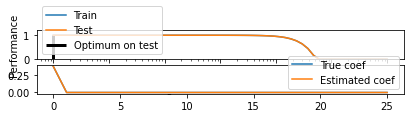

In [38]:

plt.subplot(2, 1 ,1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color = 'k', linewidth =3, label = 'Optimum on test')
plt.legend(loc = 'lower left')
plt.ylim([0, 1.2])

plt.xlabel('Regularization Parameters')
plt.ylabel('Performance')

plt.subplot(2, 1, 2)
plt.plot(coef_, label = 'True coef')
plt.plot(coef_, label= 'Estimated coef')
plt.legend()
plt.subplots_adjust(0.09, 0.04, 0.94, 0.26, 0.26)
plt.show()

In [39]:
print(classification_report(y_test, yhat2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       316
           1       1.00      1.00      1.00      1710

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



In [40]:
print(classification_report(y_train, yhat222))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1311
           1       1.00      1.00      1.00      6790

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101



In [41]:
from sklearn.linear_model import LogisticRegression

alphas = np.logspace(-5, 1, 60)
enet = LogisticRegression(C= 0.01, solver = 'liblinear')
train_errors = list()
test_errors = list()

for alpha in  alphas:
    #enet.set_params(alpha = alpha)
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))
    
# i_alpha_optim = np.argmax(test_errors)
# alpha_optim = alphas[i_alpha_optim]
# print("optimal regularization parameter: %s" % alpha_optim)


# enet.set_params(alpha = alpha_optim)
# coef_ = enet.fit(X,y).coef_
# coef_

In [42]:
print(train_errors)
print(test_errors)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
